        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63
First few rows of the dataset:
        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63

Missing values in each column:
Date     0
Price    0
dtype: int64

Data types:
Date      object
Price    float64
dtype: object

Number of duplicate rows: 0

Statistical summary:
                                Date        Price
count                           9011  9011.000000
mean   2005-02-10 23:46:53.760958720    48.420782
min              1987-05-20 00:00:00     9.100000
25%              1996-03-20 12:00:00    19.050000
50%              2005-02-02 00:00:00    38.570000
75%              2014-01-09 12:00:00    70.090000
max              2022-11-14 00:00:00   143.950000
std                              NaN    32.860110


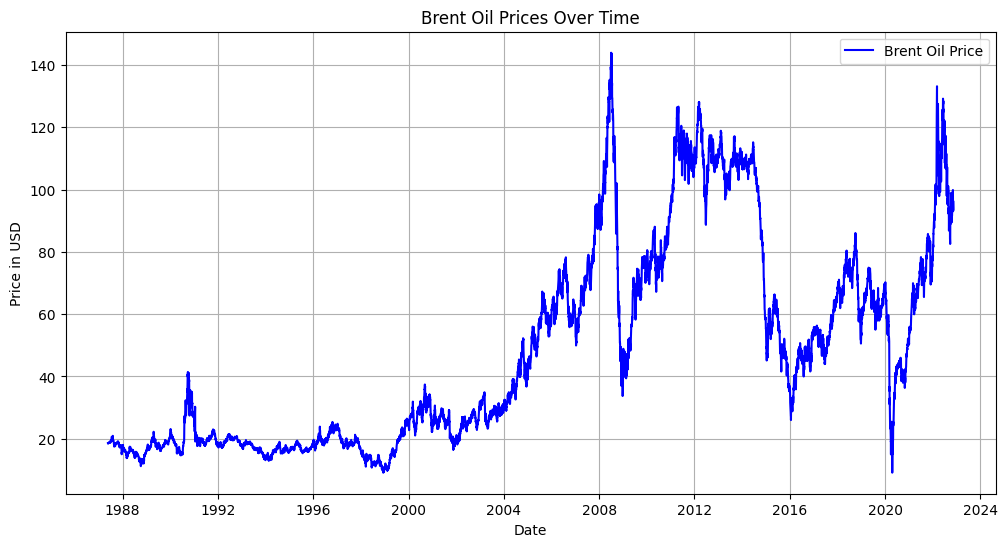

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Step 1: Load the dataset
data_path = r'/home/bamw/Downloads/Compressed/data-20241101T120533Z-001/data/Copy of BrentOilPrices.csv'  
brent_data = pd.read_csv(data_path)

# Display the first few rows of the dataset
print(brent_data.head())

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(brent_data.head())

# Step 2: Understand the data
print("\nMissing values in each column:")
print(brent_data.isnull().sum())

# Display data types
print("\nData types:")
print(brent_data.dtypes)

# Convert 'Date' to datetime format
brent_data['Date'] = pd.to_datetime(brent_data['Date'], errors='coerce')

# Check for any dates that could not be converted
if brent_data['Date'].isnull().any():
    print("Some dates could not be converted. Check for errors:")
    print(brent_data[brent_data['Date'].isnull()])

# Step 3: Clean the data
brent_data.ffill(inplace=True)  

# Check for duplicate rows
duplicate_rows = brent_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

# Step 4: Analyze data summary
summary = brent_data.describe()
print("\nStatistical summary:")
print(summary)

# Step 5: Data Visualization
brent_data.set_index('Date', inplace=True)

# Plotting the Brent oil prices over time
plt.figure(figsize=(12, 6))
plt.plot(brent_data['Price'], label='Brent Oil Price', color='blue')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid()
plt.show()

# Prepare the data for modeling
brent_data.reset_index(inplace=True)
brent_data['Date'] = brent_data['Date'].map(pd.Timestamp.timestamp)  


In [40]:

assumptions = {
    "Data Accuracy and Reliability": [
        "The data used to generate the graph is assumed to be accurate and reliable, collected from reputable sources and processed without significant errors.",
        "The data is representative of the global Brent oil market and reflects the true price movements."
    ],
    "Market Efficiency": [
        "The Brent oil market is assumed to be efficient, meaning that all available information is quickly incorporated into prices.",
        "Market participants act rationally and make decisions based on available information."
    ],
    "External Factors": [
        "The graph only considers the price of Brent oil and doesn't explicitly account for the impact of external factors like geopolitical events, economic conditions, technological advancements, or environmental regulations."
    ]
}

limitations = {
    "Historical Data": [
        "The graph provides a historical view of Brent oil prices, which may not accurately predict future trends.",
        "Past performance is not necessarily indicative of future results."
    ],
    "Data Granularity": [
        "The graph likely represents daily, weekly, or monthly price data, which may not capture short-term price volatility."
    ],
    "Market Complexity": [
        "The Brent oil market is complex and influenced by numerous factors, including supply and demand dynamics and geopolitical risks."
    ],
    "Data Source and Methodology": [
        "The reliability of the analysis depends on the quality and accuracy of the data source and the methodology used."
    ],
    "External Shocks": [
        "Unexpected events like natural disasters or political instability can significantly disrupt oil markets."
    ]
}

# Function to print assumptions and limitations
def print_assumptions_limitations(assumptions, limitations):
    print("\nAssumptions:")
    for key, values in assumptions.items():
        print(f"- {key}:")
        for value in values:
            print(f"  * {value}")
    
    print("\nLimitations:")
    for key, values in limitations.items():
        print(f"- {key}:")
        for value in values:
            print(f"  * {value}")

# Print Assumptions and Limitations
print_assumptions_limitations(assumptions, limitations)

# Define Model Selection and Training Steps
model_selection_training = {
    "Model Selection": {
        "Time Series Models": [
            "ARIMA (AutoRegressive Integrated Moving Average)",
            "GARCH (Generalized Autoregressive Conditional Heteroskedasticity)",
            "Exponential Smoothing"
        ],
        "Machine Learning Models": [
            "Random Forest",
            "XGBoost",
            "LSTM (Long Short-Term Memory)"
        ]
    },
    "Model Training": [
        "Split Data: Divide the data into training and testing sets.",
        "Feature Scaling: Scale numerical features to a common range (e.g., normalization or standardization).",
        "Model Training: Train the selected model on the training data.",
        "Hyperparameter Tuning: Optimize model hyperparameters using techniques like grid search or random search."
    ]
}

# Function to print model selection and training
def print_model_selection_training(model_selection_training):
    print("\nModel Selection:")
    for key, values in model_selection_training["Model Selection"].items():
        print(f"- {key}:")
        for value in values:
            print(f"  * {value}")

    print("\nModel Training Steps:")
    for step in model_selection_training["Model Training"]:
        print(f"- {step}")

# Print Model Selection and Training
print_model_selection_training(model_selection_training)

# Define Model Evaluation and Refinement Steps
model_evaluation_refinement = {
    "Model Evaluation": {
        "Evaluation Metrics": [
            "Use metrics like RMSE, MAE, MAPE, or R-squared to assess model performance.",
            "Cross-Validation: Use cross-validation to get a more robust estimate of model performance.",
            "Residual Analysis: Check for patterns in the residuals to identify potential model deficiencies."
        ]
    },
    "Model Refinement": [
        "Feature Engineering: Add or remove features based on their importance and contribution to model performance.",
        "Hyperparameter Tuning: Fine-tune model hyperparameters to improve performance.",
        "Model Selection: Try different models and compare their performance.",
        "Ensemble Methods: Combine multiple models to improve predictive accuracy."
    ]
}

# Function to print model evaluation and refinement
def print_model_evaluation_refinement(model_evaluation_refinement):
    print("\nModel Evaluation:")
    for key, values in model_evaluation_refinement["Model Evaluation"].items():
        print(f"- {key}:")
        for value in values:
            print(f"  * {value}")

    print("\nModel Refinement Steps:")
    for step in model_evaluation_refinement["Model Refinement"]:
        print(f"- {step}")

# Print Model Evaluation and Refinement
print_model_evaluation_refinement(model_evaluation_refinement)



Assumptions:
- Data Accuracy and Reliability:
  * The data used to generate the graph is assumed to be accurate and reliable, collected from reputable sources and processed without significant errors.
  * The data is representative of the global Brent oil market and reflects the true price movements.
- Market Efficiency:
  * The Brent oil market is assumed to be efficient, meaning that all available information is quickly incorporated into prices.
  * Market participants act rationally and make decisions based on available information.
- External Factors:
  * The graph only considers the price of Brent oil and doesn't explicitly account for the impact of external factors like geopolitical events, economic conditions, technological advancements, or environmental regulations.

Limitations:
- Historical Data:
  * The graph provides a historical view of Brent oil prices, which may not accurately predict future trends.
  * Past performance is not necessarily indicative of future results.
-

In [41]:
# Understanding the Model and Data
def read_references():
    """
    Function to simulate reading main references related to the project.
    In practice, you would replace this with actual references.
    """
    references = [
        "1. Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: principles and practice.",
        "2. Tsay, R. S. (2010). Analysis of Financial Time Series.",
        "3. Box, G. E. P., Jenkins, G. M., & Reinsel, G. C. (2015). Time Series Analysis: Forecasting and Control."
    ]
    return references

def familiarize_models():
    """
    Function to outline key time series models suitable for analyzing Brent oil prices.
    """
    models = {
        "ARIMA": {
            "Description": "AutoRegressive Integrated Moving Average model for forecasting.",
            "Purpose": "Captures autocorrelations in time series data to predict future points.",
            "Application": "Used for univariate time series data, such as daily Brent oil prices."
        },
        "GARCH": {
            "Description": "Generalized Autoregressive Conditional Heteroskedasticity model.",
            "Purpose": "Models volatility clustering in time series data, useful for financial applications.",
            "Application": "Helps in understanding price fluctuations and risk management."
        },
        "Exponential Smoothing": {
            "Description": "Forecasting method that weights recent observations more heavily.",
            "Purpose": "Provides a simple approach to smoothing data.",
            "Application": "Useful for short-term forecasting of prices."
        }
    }
    return models

def explain_models_context(models):
    """
    Function to explain the purpose and application of the chosen models in the context of Brent oil prices.
    """
    explanations = []
    for model, details in models.items():
        explanation = f"{model}:\n"
        explanation += f"  - Description: {details['Description']}\n"
        explanation += f"  - Purpose: {details['Purpose']}\n"
        explanation += f"  - Application: {details['Application']}\n"
        explanations.append(explanation)
    return explanations

def identify_data_generation_process():
    """
    Function to describe the processes that generate the Brent oil prices data.
    """
    processes = {
        "Supply and Demand": "The balance between oil production and consumption affects prices.",
        "Market Speculation": "Traders' expectations about future prices influence current price movements.",
        "Geopolitical Events": "Conflicts or policy changes in oil-producing regions can lead to price volatility.",
        "Economic Indicators": "Reports such as GDP growth rates and employment data impact oil demand forecasts."
    }
    return processes

def describe_outputs_and_limitations():
    """
    Function to describe the expected outputs and limitations of the analysis.
    """
    outputs = {
        "Expected Outputs": [
            "Forecasted Brent oil prices for future periods.",
            "Confidence intervals for price predictions.",
            "Insights into the volatility of oil prices over time."
        ],
        "Limitations": [
            "Model assumptions may not hold in all market conditions.",
            "Historical data may not fully capture future market dynamics.",
            "External shocks can lead to unpredictable price movements."
        ]
    }
    return outputs

# Main execution
if __name__ == "__main__":
    # Read references
    references = read_references()
    print("Key References:")
    for ref in references:
        print(ref)

    # Familiarize with models
    models = familiarize_models()
    
    # Explain models in context
    explanations = explain_models_context(models)
    print("\nModel Explanations:")
    for explanation in explanations:
        print(explanation)

    # Identify data generation processes
    data_processes = identify_data_generation_process()
    print("\nData Generation Processes:")
    for key, value in data_processes.items():
        print(f"- {key}: {value}")

    # Describe expected outputs and limitations
    outputs_and_limitations = describe_outputs_and_limitations()
    print("\nExpected Outputs:")
    for output in outputs_and_limitations["Expected Outputs"]:
        print(f"- {output}")
        
    print("\nLimitations:")
    for limitation in outputs_and_limitations["Limitations"]:
        print(f"- {limitation}")


Key References:
1. Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: principles and practice.
2. Tsay, R. S. (2010). Analysis of Financial Time Series.
3. Box, G. E. P., Jenkins, G. M., & Reinsel, G. C. (2015). Time Series Analysis: Forecasting and Control.

Model Explanations:
ARIMA:
  - Description: AutoRegressive Integrated Moving Average model for forecasting.
  - Purpose: Captures autocorrelations in time series data to predict future points.
  - Application: Used for univariate time series data, such as daily Brent oil prices.

GARCH:
  - Description: Generalized Autoregressive Conditional Heteroskedasticity model.
  - Purpose: Models volatility clustering in time series data, useful for financial applications.
  - Application: Helps in understanding price fluctuations and risk management.

Exponential Smoothing:
  - Description: Forecasting method that weights recent observations more heavily.
  - Purpose: Provides a simple approach to smoothing data.
  - Application: Us